In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [ ]:
path = "/content/gdrive/MyDrive/praktikum_ml/praktikum02/"


In [ ]:
import pandas as pd
df = pd.read_csv(path + 'data/500_Person_Gender_Height_Weight_Index.csv')
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Height'].mean()

np.float64(169.944)

In [ ]:
df['Height'].median()

170.5

In [ ]:
df['Height'].mode()

,Height
0,188


In [ ]:
df.var(numeric_only=True)

,0
Height,268.149162
Weight,1048.633267
Index,1.836168


In [ ]:
df.std(numeric_only=True)

,0
Height,16.375261
Weight,32.382607
Index,1.355053


In [ ]:
q1 = df['Height'].quantile(0.25)
print("Q1 : ", q1)
q3 = df['Height'].quantile(0.75)
print("Q3 : ", q3)
iqr  = q3 - q1
print("IQR : ", iqr)

Q1 :  156.0
Q3 :  184.0
IQR :  28.0


In [ ]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [ ]:
# menghitung matriks korelasi untuk semua kolom numerik
correlation_matrix = df.corr(numeric_only=True)

# menampilkan matriks korelasi
print("Matriks Korelasi : ")
print(correlation_matrix)

Matriks Korelasi : 
          Height    Weight     Index
Height  1.000000  0.000446 -0.422223
Weight  0.000446  1.000000  0.804569
Index  -0.422223  0.804569  1.000000


<Axes: >

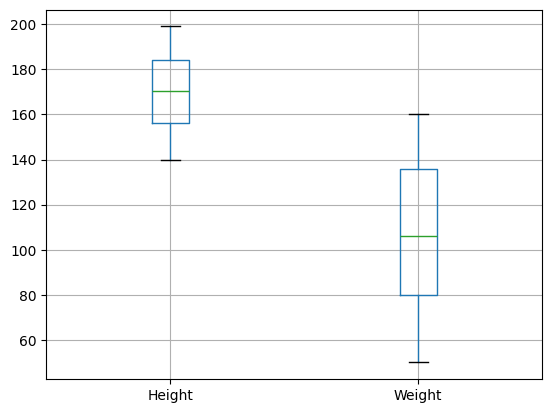

In [ ]:
import pandas as pd
import numpy as np

df.boxplot(column=['Height', 'Weight'])

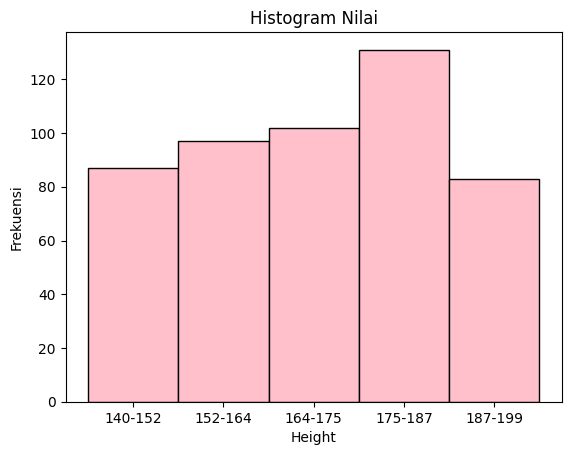

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ambil data height
data_height = df["Height"]

# Buat histogram
n, bins, patches = plt.hist(x=data_height, bins=5, color='pink', edgecolor='black')

# Tambahkan Label
plt.title('Histogram Nilai')
plt.xlabel('Height')
plt.ylabel('Frekuensi')

# Tampilkan rentang frekuensi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f}'.format(bins[i], bins[i+1]) for i in range(len(bins) - 1)])
plt.show()

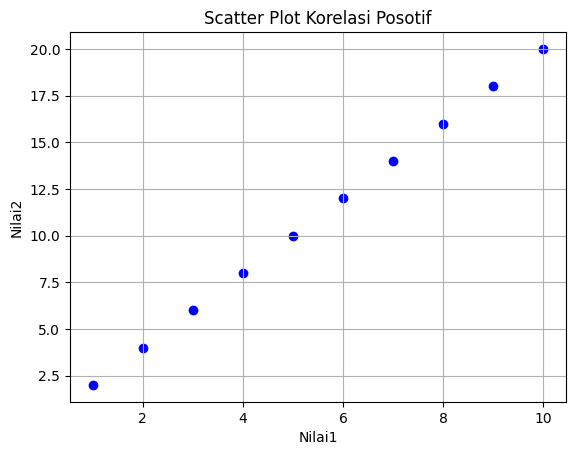

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#buat DataFrame Contoh
data = {
    'Nilai1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Nilai2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
}
df2 = pd.DataFrame(data)

#Membuat scatter plot
plt.scatter(df2['Nilai1'], df2['Nilai2'], color='blue', marker='o')

# tambahkan Label
plt.title('Scatter Plot Korelasi Posotif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

# Tambahkan grid
plt.grid(True)

# Tampilkan Plot
plt.show()

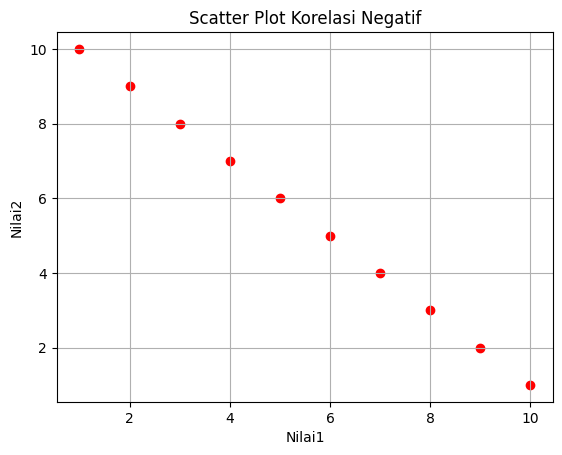

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#buat DataFrame Contoh
data = {
    'Nilai1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Nilai2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
}

df3 = pd.DataFrame(data)
plt.scatter(df3['Nilai1'], df3['Nilai2'], color='red', marker='o')

# tambahkan Label
plt.title('Scatter Plot Korelasi Negatif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

# tambahkan grid
plt.grid(True)

#tampilkan plot
plt.show()

In [ ]:
import pandas as pd

df2 = pd.read_csv(path + 'data/day.csv')
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Baca file day.csv
df2 = pd.read_csv(path + 'data/day.csv')

print("Jumlah total data:", len(df))

# Bagi data menjadi Training (80%) dan Testing (20%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Validation (10% dari Training)
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

# Cek jumlah masing-masing
print("Training    :", len(train_df))
print("Validation  :", len(val_df))
print("Testing     :", len(test_df))

ModuleNotFoundError: No module named 'sklearn'